# Data Analysis for Damped Harmonic Oscillator

Welcome to Jupyter! This is an environment of cells where you can mix code with text-entry, images and more. 

This notebook will take you through the process of importing data from a csv file, plotting that data and curve-fitting to it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import math

To import data, use the `genfromtext` function. It will look for the file in the same directory as the Python file is located in, so you may have to change the path (or move your file). 

Text(0, 0.5, 'position (cm)')

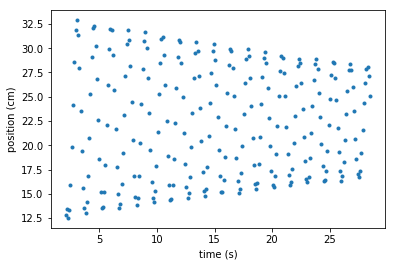

In [2]:
FILE_NAME = 'Pendulum_Sample_Data.csv' # UPDATE WITH YOUR FILENAME
my_data = np.genfromtxt(FILE_NAME, delimiter=',')

# extract data from array
count = my_data[:,0]
time = my_data[:,1]
position = my_data[:,2]

plt.plot(time, position, '.') # plot time vs position
plt.xlabel('time (s)')
plt.ylabel('position (cm)')

You may find that you have excess data at the beginning or end of your file. You can remove this by trimming your array.

Text(0, 0.5, 'position (cm)')

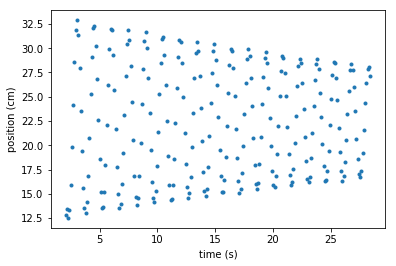

In [3]:
rStart = 1 # remove rStart first data-points
rEnd   = 0 # remove rEnd last data-points

#count     = my_data[rStrart : -(rEnd + 1), 0] 
time     = my_data[rStart : -(rEnd + 1), 1] 
position = my_data[rStart : -(rEnd + 1), 2]

plt.plot(time, position, '.') # plot time vs position
plt.xlabel('time (s)')
plt.ylabel('position (cm)')

## Curve Fitting
The data we have describes the motion of a pendulum. Assuming simple harmonic motion, we can use a differential equation to describe its motion
$$ m \frac{d^2x}{dt^2} +\zeta \frac{dx}{dt} + kx = F $$

where 
- x = displacement of the pendulum from the equilibrium position
- t = time
- m = mass of the pendulum
- $\zeta$ = damping factor
- k = spring constant/proportionality constant for restoring force, $k=mg/L$
- F = driving force

For unforced oscillations where no external force is applied, we set $F=0$ and solve the differential equation to get a solution on the form
$$ y(t) = a+b e^{-ct}\sin(d\cdot t+e) $$

where the constants a, b, c, d and e are given by:
- a = equilibrium position of the pendulum
- b = amplitude of oscilations for $t=0$
- c = decay time constant, $$c=\frac{\zeta}{2m}$$
- d = angular frequency of oscillations, $$d = \sqrt{\frac{k}{m} - \frac{\zeta^2}{4m^2}}$$
- e = phase offset, dependent on where in the swing the pendulum was at $t=0$

We can use the `curve_fit` toolbox to fit a curve of this form to the data, and see what values these constants must have to fit.

fit: a=22.523, b=10.714, c=0.022, d=4.231, e=1.321


Text(0, 0.5, 'position (cm)')

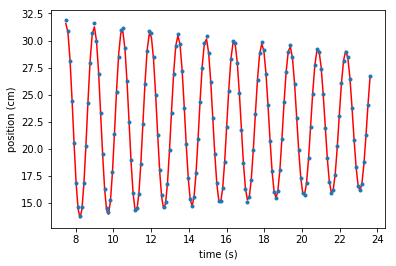

In [4]:
# use knowledge of system to define a function describing system motion with free parameters
def fitfunc(t, a, b, c, d, e):
    return a + b*np.exp(-c*t) * np.sin(d*t+e)

# parameter order [a, b, c, d, e]
lowerBound = [0, 0, 0, 0, 0]           # lower bound on free parameters
upperBound = [500, 500, 1, 5, 2*np.pi] # upper bound on free parameters

popt, pcov = curve_fit(fitfunc, time, position, bounds=(lowerBound, upperBound))
a,b,c,d,e = tuple(popt)

label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt)
print(label)

# Plot result against original data points
l = 50  # left bound for plotting window
r = 200 # right bound for plotting window

plt.plot(time[l:r], fitfunc(time[l:r], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))
plt.plot(time[l:r], position[l:r], '.')
plt.xlabel('time (s)')
plt.ylabel('position (cm)')

Using the length from the center of mass of the pendulum to the attachment point to the stand, we can now compute the gravitational acceleration.

In [5]:
L = 0.56 # meters, pendulum length

g_theoretical = 9.81  # m/s
g_measured = d**2 * L # m/s
g_error = (1-g_measured/g_theoretical)*100

print('g_theoretical = %5.3f m/s' % g_theoretical)
print('g_measured = %5.3f m/s' % g_measured)
print('error = %4.1f%%' % g_error)

g_theoretical = 9.810 m/s
g_measured = 10.024 m/s
error = -2.2%
